In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_csv("health_camp_screenings.csv")

In [65]:
df

,visit_date,district,camp_id,gender,age,bmi,bp_sys,bp_dia,fasting_status,glucose_fasting_mgdl,smoker
0,2024-12-17,Vikarabad,1009,Female,41.0,29.3,130,73.0,Fasted,110.2,No
1,2025-04-19,Medak,1002,Male,34.0,30.5,126,100.0,Fasted,108.3,No
2,2025-03-28,Wanaparthy,1014,Female,61.0,30.0,104,73.0,Not fasted,94.8,NaN
3,2025-02-17,Vikarabad,1014,Female,37.0,27.6,110,71.0,Fasted,87.5,No
4,2025-02-16,Sircilla,1011,Male,NaN,27.6,119,82.0,Fasted,113.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...
445,2025-03-30,Medak,1005,Male,41.0,24.3,136,85.0,Not fasted,84.5,No
446,2025-01-26,Medak,1015,Female,31.0,31.1,120,86.0,Fasted,80.5,NaN
447,2025-05-22,Mulugu,1015,Female,54.0,23.7,132,104.0,Fasted,79.8,No
448,2025-03-04,Jogulamba,1006,Female,58.0,16.6,132,74.0,Fasted,120.8,Yes


In [66]:
missing_count = df.isnull().sum()
missing_count

visit_date               0
district                 5
camp_id                  0
gender                   4
age                     11
bmi                     23
bp_sys                   0
bp_dia                   2
fasting_status           0
glucose_fasting_mgdl    70
smoker                  28
dtype: int64

In [67]:
round(df.isnull().sum()*100/len(df))

visit_date               0.0
district                 1.0
camp_id                  0.0
gender                   1.0
age                      2.0
bmi                      5.0
bp_sys                   0.0
bp_dia                   0.0
fasting_status           0.0
glucose_fasting_mgdl    16.0
smoker                   6.0
dtype: float64

In [68]:
df.isnull().sum(axis=0)

visit_date               0
district                 5
camp_id                  0
gender                   4
age                     11
bmi                     23
bp_sys                   0
bp_dia                   2
fasting_status           0
glucose_fasting_mgdl    70
smoker                  28
dtype: int64

In [69]:
df_cleaned = df[df.isnull().sum(axis=1) < 2]
df_cleaned

,visit_date,district,camp_id,gender,age,bmi,bp_sys,bp_dia,fasting_status,glucose_fasting_mgdl,smoker
0,2024-12-17,Vikarabad,1009,Female,41.0,29.3,130,73.0,Fasted,110.2,No
1,2025-04-19,Medak,1002,Male,34.0,30.5,126,100.0,Fasted,108.3,No
2,2025-03-28,Wanaparthy,1014,Female,61.0,30.0,104,73.0,Not fasted,94.8,NaN
3,2025-02-17,Vikarabad,1014,Female,37.0,27.6,110,71.0,Fasted,87.5,No
4,2025-02-16,Sircilla,1011,Male,NaN,27.6,119,82.0,Fasted,113.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...
445,2025-03-30,Medak,1005,Male,41.0,24.3,136,85.0,Not fasted,84.5,No
446,2025-01-26,Medak,1015,Female,31.0,31.1,120,86.0,Fasted,80.5,NaN
447,2025-05-22,Mulugu,1015,Female,54.0,23.7,132,104.0,Fasted,79.8,No
448,2025-03-04,Jogulamba,1006,Female,58.0,16.6,132,74.0,Fasted,120.8,Yes


In [70]:
df_cleaned['gender'].fillna(df['gender'].mode(),inplace=True)
df_cleaned

C:\Users\dokur\AppData\Local\Temp\ipykernel_15112\1843196729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['gender'].fillna(df['gender'].mode(),inplace=True)


,visit_date,district,camp_id,gender,age,bmi,bp_sys,bp_dia,fasting_status,glucose_fasting_mgdl,smoker
0,2024-12-17,Vikarabad,1009,Female,41.0,29.3,130,73.0,Fasted,110.2,No
1,2025-04-19,Medak,1002,Male,34.0,30.5,126,100.0,Fasted,108.3,No
2,2025-03-28,Wanaparthy,1014,Female,61.0,30.0,104,73.0,Not fasted,94.8,NaN
3,2025-02-17,Vikarabad,1014,Female,37.0,27.6,110,71.0,Fasted,87.5,No
4,2025-02-16,Sircilla,1011,Male,NaN,27.6,119,82.0,Fasted,113.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...
445,2025-03-30,Medak,1005,Male,41.0,24.3,136,85.0,Not fasted,84.5,No
446,2025-01-26,Medak,1015,Female,31.0,31.1,120,86.0,Fasted,80.5,NaN
447,2025-05-22,Mulugu,1015,Female,54.0,23.7,132,104.0,Fasted,79.8,No
448,2025-03-04,Jogulamba,1006,Female,58.0,16.6,132,74.0,Fasted,120.8,Yes


In [71]:
df_cleaned.shape

(436, 11)

In [72]:
df_cleaned.isnull().sum(axis=0)

visit_date               0
district                 5
camp_id                  0
gender                   3
age                      8
bmi                     19
bp_sys                   0
bp_dia                   2
fasting_status           0
glucose_fasting_mgdl    58
smoker                  20
dtype: int64

In [73]:
df_cleaned.describe()

,camp_id,age,bmi,bp_sys,bp_dia,glucose_fasting_mgdl
count,436.000000,428.000000,417.000000,436.000000,434.000000,378.000000
mean,1009.607798,38.976636,24.805995,119.133028,78.122120,97.821164
std,5.174636,11.338290,5.128380,14.769515,10.394363,20.811921
min,1001.000000,18.000000,11.200000,84.000000,50.000000,38.100000
25%,1005.000000,31.000000,21.500000,108.000000,71.000000,83.700000
50%,1010.000000,39.000000,24.800000,120.000000,79.000000,97.900000
75%,1014.000000,46.000000,28.000000,129.000000,85.000000,110.975000
max,1018.000000,75.000000,52.000000,163.000000,107.000000,235.000000


In [74]:
df_cleaned.isnull().sum(axis=0)

visit_date               0
district                 5
camp_id                  0
gender                   3
age                      8
bmi                     19
bp_sys                   0
bp_dia                   2
fasting_status           0
glucose_fasting_mgdl    58
smoker                  20
dtype: int64

In [75]:
df_cleaned['age'].fillna(df['age'].median(),inplace=True)
df_cleaned

C:\Users\dokur\AppData\Local\Temp\ipykernel_15112\4003359887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age'].fillna(df['age'].median(),inplace=True)


,visit_date,district,camp_id,gender,age,bmi,bp_sys,bp_dia,fasting_status,glucose_fasting_mgdl,smoker
0,2024-12-17,Vikarabad,1009,Female,41.0,29.3,130,73.0,Fasted,110.2,No
1,2025-04-19,Medak,1002,Male,34.0,30.5,126,100.0,Fasted,108.3,No
2,2025-03-28,Wanaparthy,1014,Female,61.0,30.0,104,73.0,Not fasted,94.8,NaN
3,2025-02-17,Vikarabad,1014,Female,37.0,27.6,110,71.0,Fasted,87.5,No
4,2025-02-16,Sircilla,1011,Male,39.0,27.6,119,82.0,Fasted,113.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...
445,2025-03-30,Medak,1005,Male,41.0,24.3,136,85.0,Not fasted,84.5,No
446,2025-01-26,Medak,1015,Female,31.0,31.1,120,86.0,Fasted,80.5,NaN
447,2025-05-22,Mulugu,1015,Female,54.0,23.7,132,104.0,Fasted,79.8,No
448,2025-03-04,Jogulamba,1006,Female,58.0,16.6,132,74.0,Fasted,120.8,Yes


In [76]:
df_cleaned.isnull().sum(axis=0)

visit_date               0
district                 5
camp_id                  0
gender                   3
age                      0
bmi                     19
bp_sys                   0
bp_dia                   2
fasting_status           0
glucose_fasting_mgdl    58
smoker                  20
dtype: int64

In [77]:
df_cleaned=df_cleaned.dropna(subset=['gender'])
df_cleaned

,visit_date,district,camp_id,gender,age,bmi,bp_sys,bp_dia,fasting_status,glucose_fasting_mgdl,smoker
0,2024-12-17,Vikarabad,1009,Female,41.0,29.3,130,73.0,Fasted,110.2,No
1,2025-04-19,Medak,1002,Male,34.0,30.5,126,100.0,Fasted,108.3,No
2,2025-03-28,Wanaparthy,1014,Female,61.0,30.0,104,73.0,Not fasted,94.8,NaN
3,2025-02-17,Vikarabad,1014,Female,37.0,27.6,110,71.0,Fasted,87.5,No
4,2025-02-16,Sircilla,1011,Male,39.0,27.6,119,82.0,Fasted,113.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...
445,2025-03-30,Medak,1005,Male,41.0,24.3,136,85.0,Not fasted,84.5,No
446,2025-01-26,Medak,1015,Female,31.0,31.1,120,86.0,Fasted,80.5,NaN
447,2025-05-22,Mulugu,1015,Female,54.0,23.7,132,104.0,Fasted,79.8,No
448,2025-03-04,Jogulamba,1006,Female,58.0,16.6,132,74.0,Fasted,120.8,Yes


In [78]:
df_cleaned.isnull().sum(axis=0)

visit_date               0
district                 5
camp_id                  0
gender                   0
age                      0
bmi                     19
bp_sys                   0
bp_dia                   2
fasting_status           0
glucose_fasting_mgdl    58
smoker                  20
dtype: int64

In [79]:
df_cleaned=df_cleaned.dropna(subset=['district'])
df_cleaned

,visit_date,district,camp_id,gender,age,bmi,bp_sys,bp_dia,fasting_status,glucose_fasting_mgdl,smoker
0,2024-12-17,Vikarabad,1009,Female,41.0,29.3,130,73.0,Fasted,110.2,No
1,2025-04-19,Medak,1002,Male,34.0,30.5,126,100.0,Fasted,108.3,No
2,2025-03-28,Wanaparthy,1014,Female,61.0,30.0,104,73.0,Not fasted,94.8,NaN
3,2025-02-17,Vikarabad,1014,Female,37.0,27.6,110,71.0,Fasted,87.5,No
4,2025-02-16,Sircilla,1011,Male,39.0,27.6,119,82.0,Fasted,113.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...
445,2025-03-30,Medak,1005,Male,41.0,24.3,136,85.0,Not fasted,84.5,No
446,2025-01-26,Medak,1015,Female,31.0,31.1,120,86.0,Fasted,80.5,NaN
447,2025-05-22,Mulugu,1015,Female,54.0,23.7,132,104.0,Fasted,79.8,No
448,2025-03-04,Jogulamba,1006,Female,58.0,16.6,132,74.0,Fasted,120.8,Yes


In [80]:
df_cleaned.isnull().sum(axis=0)

visit_date               0
district                 0
camp_id                  0
gender                   0
age                      0
bmi                     19
bp_sys                   0
bp_dia                   2
fasting_status           0
glucose_fasting_mgdl    58
smoker                  20
dtype: int64

In [81]:
df_cleaned['bmi'].fillna(df['bmi'].mean(),inplace=True)
df_cleaned

C:\Users\dokur\AppData\Local\Temp\ipykernel_15112\2390543042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['bmi'].fillna(df['bmi'].mean(),inplace=True)


,visit_date,district,camp_id,gender,age,bmi,bp_sys,bp_dia,fasting_status,glucose_fasting_mgdl,smoker
0,2024-12-17,Vikarabad,1009,Female,41.0,29.3,130,73.0,Fasted,110.2,No
1,2025-04-19,Medak,1002,Male,34.0,30.5,126,100.0,Fasted,108.3,No
2,2025-03-28,Wanaparthy,1014,Female,61.0,30.0,104,73.0,Not fasted,94.8,NaN
3,2025-02-17,Vikarabad,1014,Female,37.0,27.6,110,71.0,Fasted,87.5,No
4,2025-02-16,Sircilla,1011,Male,39.0,27.6,119,82.0,Fasted,113.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...
445,2025-03-30,Medak,1005,Male,41.0,24.3,136,85.0,Not fasted,84.5,No
446,2025-01-26,Medak,1015,Female,31.0,31.1,120,86.0,Fasted,80.5,NaN
447,2025-05-22,Mulugu,1015,Female,54.0,23.7,132,104.0,Fasted,79.8,No
448,2025-03-04,Jogulamba,1006,Female,58.0,16.6,132,74.0,Fasted,120.8,Yes


In [82]:
df_cleaned.isnull().sum(axis=0)

visit_date               0
district                 0
camp_id                  0
gender                   0
age                      0
bmi                      0
bp_sys                   0
bp_dia                   2
fasting_status           0
glucose_fasting_mgdl    58
smoker                  20
dtype: int64

In [83]:
df_cleaned['bp_dia'].fillna(df['bp_dia'].mean(),inplace=True)
df_cleaned

C:\Users\dokur\AppData\Local\Temp\ipykernel_15112\3107062468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['bp_dia'].fillna(df['bp_dia'].mean(),inplace=True)


,visit_date,district,camp_id,gender,age,bmi,bp_sys,bp_dia,fasting_status,glucose_fasting_mgdl,smoker
0,2024-12-17,Vikarabad,1009,Female,41.0,29.3,130,73.0,Fasted,110.2,No
1,2025-04-19,Medak,1002,Male,34.0,30.5,126,100.0,Fasted,108.3,No
2,2025-03-28,Wanaparthy,1014,Female,61.0,30.0,104,73.0,Not fasted,94.8,NaN
3,2025-02-17,Vikarabad,1014,Female,37.0,27.6,110,71.0,Fasted,87.5,No
4,2025-02-16,Sircilla,1011,Male,39.0,27.6,119,82.0,Fasted,113.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...
445,2025-03-30,Medak,1005,Male,41.0,24.3,136,85.0,Not fasted,84.5,No
446,2025-01-26,Medak,1015,Female,31.0,31.1,120,86.0,Fasted,80.5,NaN
447,2025-05-22,Mulugu,1015,Female,54.0,23.7,132,104.0,Fasted,79.8,No
448,2025-03-04,Jogulamba,1006,Female,58.0,16.6,132,74.0,Fasted,120.8,Yes


In [84]:
df_cleaned.isnull().sum(axis=0)

visit_date               0
district                 0
camp_id                  0
gender                   0
age                      0
bmi                      0
bp_sys                   0
bp_dia                   0
fasting_status           0
glucose_fasting_mgdl    58
smoker                  20
dtype: int64

In [85]:
df_cleaned['glucose_fasting_mgdl'].mean()

98.09675675675676

In [86]:
df_cleaned['glucose_fasting_mgdl'].fillna(df['glucose_fasting_mgdl'].mean(),inplace=True)
df_cleaned

C:\Users\dokur\AppData\Local\Temp\ipykernel_15112\2599804478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['glucose_fasting_mgdl'].fillna(df['glucose_fasting_mgdl'].mean(),inplace=True)


,visit_date,district,camp_id,gender,age,bmi,bp_sys,bp_dia,fasting_status,glucose_fasting_mgdl,smoker
0,2024-12-17,Vikarabad,1009,Female,41.0,29.3,130,73.0,Fasted,110.2,No
1,2025-04-19,Medak,1002,Male,34.0,30.5,126,100.0,Fasted,108.3,No
2,2025-03-28,Wanaparthy,1014,Female,61.0,30.0,104,73.0,Not fasted,94.8,NaN
3,2025-02-17,Vikarabad,1014,Female,37.0,27.6,110,71.0,Fasted,87.5,No
4,2025-02-16,Sircilla,1011,Male,39.0,27.6,119,82.0,Fasted,113.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...
445,2025-03-30,Medak,1005,Male,41.0,24.3,136,85.0,Not fasted,84.5,No
446,2025-01-26,Medak,1015,Female,31.0,31.1,120,86.0,Fasted,80.5,NaN
447,2025-05-22,Mulugu,1015,Female,54.0,23.7,132,104.0,Fasted,79.8,No
448,2025-03-04,Jogulamba,1006,Female,58.0,16.6,132,74.0,Fasted,120.8,Yes


In [87]:
df_cleaned.isnull().sum(axis=0)

visit_date               0
district                 0
camp_id                  0
gender                   0
age                      0
bmi                      0
bp_sys                   0
bp_dia                   0
fasting_status           0
glucose_fasting_mgdl     0
smoker                  20
dtype: int64

In [88]:
df_cleaned['smoker'].fillna('No',inplace=True)
df_cleaned

C:\Users\dokur\AppData\Local\Temp\ipykernel_15112\1748452563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['smoker'].fillna('No',inplace=True)


,visit_date,district,camp_id,gender,age,bmi,bp_sys,bp_dia,fasting_status,glucose_fasting_mgdl,smoker
0,2024-12-17,Vikarabad,1009,Female,41.0,29.3,130,73.0,Fasted,110.2,No
1,2025-04-19,Medak,1002,Male,34.0,30.5,126,100.0,Fasted,108.3,No
2,2025-03-28,Wanaparthy,1014,Female,61.0,30.0,104,73.0,Not fasted,94.8,No
3,2025-02-17,Vikarabad,1014,Female,37.0,27.6,110,71.0,Fasted,87.5,No
4,2025-02-16,Sircilla,1011,Male,39.0,27.6,119,82.0,Fasted,113.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...
445,2025-03-30,Medak,1005,Male,41.0,24.3,136,85.0,Not fasted,84.5,No
446,2025-01-26,Medak,1015,Female,31.0,31.1,120,86.0,Fasted,80.5,No
447,2025-05-22,Mulugu,1015,Female,54.0,23.7,132,104.0,Fasted,79.8,No
448,2025-03-04,Jogulamba,1006,Female,58.0,16.6,132,74.0,Fasted,120.8,Yes


In [89]:
df_cleaned.isnull().sum(axis=0)

visit_date              0
district                0
camp_id                 0
gender                  0
age                     0
bmi                     0
bp_sys                  0
bp_dia                  0
fasting_status          0
glucose_fasting_mgdl    0
smoker                  0
dtype: int64

In [90]:
## let's find out the first quantile
q1=np.quantile(df_cleaned['age'],0.25)
print("First quratile value is: ",q1)

## let's find out the second quantile
q2=np.quantile(df_cleaned['age'],0.50)
print("Second quratile value is: ",q2)

## let's find out the third quantile
q3=np.quantile(df_cleaned['age'],0.75)
print("Third quratile value is: ",q3)

First quratile value is:  31.0
Second quratile value is:  39.0
Third quratile value is:  46.0


In [91]:
## let's find out IQR,lower Boundary,upper boundary
IQR=q3-q1
U=q3+1.5*(IQR)
L=q1-1.5*(IQR)
print("Inert Qurtile range value is :",IQR)
print("Upper Boundary value is:",U)
print("Lower Boundart value is:",L)

Inert Qurtile range value is : 15.0
Upper Boundary value is: 68.5
Lower Boundart value is: 8.5


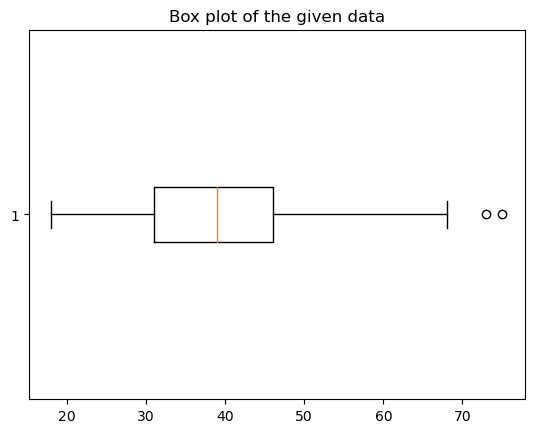

In [94]:
plt.boxplot(df_cleaned['age'],vert=False)
plt.title("Box plot of the given data")
plt.show()

In [95]:
df_cleaned.isnull().sum()

visit_date              0
district                0
camp_id                 0
gender                  0
age                     0
bmi                     0
bp_sys                  0
bp_dia                  0
fasting_status          0
glucose_fasting_mgdl    0
smoker                  0
dtype: int64